In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

# Loading the Data

In [2]:
train_dir = "Z:\MIT FutureMakers\Week 4\FER-2013/train" #passing the path with training images
test_dir = "Z:\MIT FutureMakers\Week 4\FER-2013/test"   #passing the path with testing images

In [3]:
img_size = 48 #original size of the image

# Data Augmentation

In [4]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

# random seeding
np.random.seed(1)
tf.random.set_seed(1)

In [5]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


# Building the Model

In [6]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [7]:
# initially tried 100 epochs, but stopped the model at 50 epochs after it started overfitting
epochs = 50
batch_size = 64

# Fitting the Model

In [8]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/50
359/359 [==============================] - 18s 45ms/step - loss: 1.8319 - accuracy: 0.2468 - val_loss: 1.8386 - val_accuracy: 0.2472
Epoch 2/50
359/359 [==============================] - 15s 41ms/step - loss: 1.8080 - accuracy: 0.2500 - val_loss: 1.7989 - val_accuracy: 0.2514
Epoch 3/50
359/359 [==============================] - 15s 42ms/step - loss: 1.7780 - accuracy: 0.2541 - val_loss: 1.7154 - val_accuracy: 0.3115
Epoch 4/50
359/359 [==============================] - 15s 43ms/step - loss: 1.6930 - accuracy: 0.3160 - val_loss: 1.5760 - val_accuracy: 0.3973
Epoch 5/50
359/359 [==============================] - 15s 42ms/step - loss: 1.5644 - accuracy: 0.3860 - val_loss: 1.4510 - val_accuracy: 0.4281
Epoch 6/50
359/359 [==============================] - 15s 42ms/step - loss: 1.4691 - accuracy: 0.4337 - val_loss: 1.3575 - val_accuracy: 0.4770
Epoch 7/50
359/359 [==============================] - 16s 44ms/step - loss: 1.3966 - accuracy: 0.4606 - val_loss: 1.3083 - val_accuracy:

# Plotting the Results

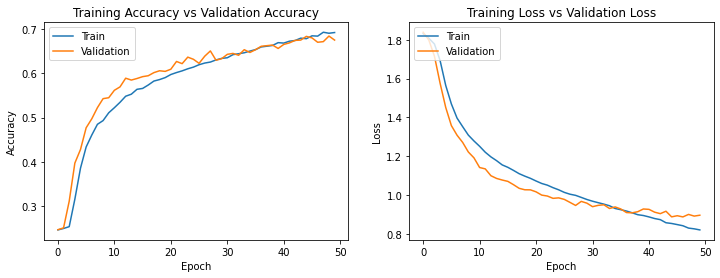

In [9]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Saving the Model

In [10]:
model.save('Z:\MIT FutureMakers\Create-a-Thon\model1')

INFO:tensorflow:Assets written to: Z:\MIT FutureMakers\Create-a-Thon\model1\assets


INFO:tensorflow:Assets written to: Z:\MIT FutureMakers\Create-a-Thon\model1\assets


In [11]:
model.save_weights('Z:\MIT FutureMakers\Create-a-Thon\model1/model.h5')